# TwinAxis (*Eixo gêmeo*)

*TwinAxis* ajuda a visualizar a plotagem de 2 gráficos w.r.t em relação ao eixo y e mesmo eixo x.

Quando usar: Quando precisamos de 2 gráficos ou dados agrupados na mesma direção, como população, dados do PIB no mesmo eixo x (Data).

### Importando bibliotecas e dados

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

austin_weather = pd.read_csv('datasets/austin_weather.csv')

In [2]:
austin_weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Extraindo Data, Temperatura Média e Velocidade Média do Vento

In [3]:
austin_weather = austin_weather[['Date', 'TempAvgF', 'WindAvgMPH']].head(30)
austin_weather

,Date,TempAvgF,WindAvgMPH
0,2013-12-21,60,4
1,2013-12-22,48,6
2,2013-12-23,45,3
3,2013-12-24,46,4
4,2013-12-25,50,2
5,2013-12-26,48,3
6,2013-12-27,53,1
7,2013-12-28,51,2
8,2013-12-29,50,5
9,2013-12-30,40,5


Extração de detalhes importantes, por exemplo, *Date* para o eixo x, *TempAvgF* e *WindAvgMPH* para os diferentes eixos y.

### Plotando duas linhas com 2 eixos Y separados com o mesmo eixo X
Primeiro cria um eixo e depois usa a função ```twinx()``` para criar outro eixo compartilhando o mesmo eixo X.

No handles with labels found to put in legend.


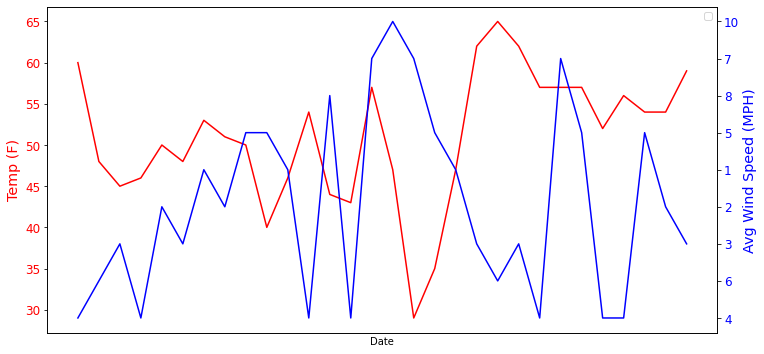

In [11]:
 # Subplot 
fig, ax_tempF = plt.subplots()  

# Similar a fig=plt.figure(figsize=(12,6))
fig.set_figwidth(12)
fig.set_figheight(6)

# seta rótulo de x 
ax_tempF.set_xlabel('Date')

# bottom= false desabilita ticks e rótulo de baixo no eixo x
ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False) 

# seta o rotulo do eixo y a esquerda
ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

# seta cor e tamanho do rótulo do eixo y a esquerda
ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

# plota AvgTemp no eixo y a esquerda
ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='red')

#ax_tempF.legend(0)

# twinx seta o mesmo eixo x para as duas plotagens
ax_precip = ax_tempF.twinx()

# seta o rotulo do eixo y a direita
ax_precip.set_ylabel('Avg Wind Speed (MPH)', 
                     color='blue', 
                     size='x-large') 

# seta cor e tamanho do rótulo do eixo y a direita
ax_precip.tick_params(axis='y', 
                      labelcolor='blue',
                      labelsize='large')

# plota WindAVg no eixo y a direita
ax_precip.plot(austin_weather['Date'], 
         austin_weather['WindAvgMPH'], 
         color='blue')

#ax_precip.legend(0)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax_tempF.transAxes)

plt.show()

Como podemos, há apenas 1 eixo, ```twinx()``` é usado para a junção do eixo x, onde o eixo y esquerdo é usado para *Temp* e o eixo y direito é usado para *WindMPH*.

### *Twin axis* para os mesmos dados
Se os mesmos dados podem ser expressos em unidades diferentes, podemos configurar nosso eixo para exibir ambas as unidades em dois eixos.


#### Função para converter de *Fahrenheit* para *Celsius*

In [12]:
def fahrenheit2celsius(f):
    return (f - 32)*5/9

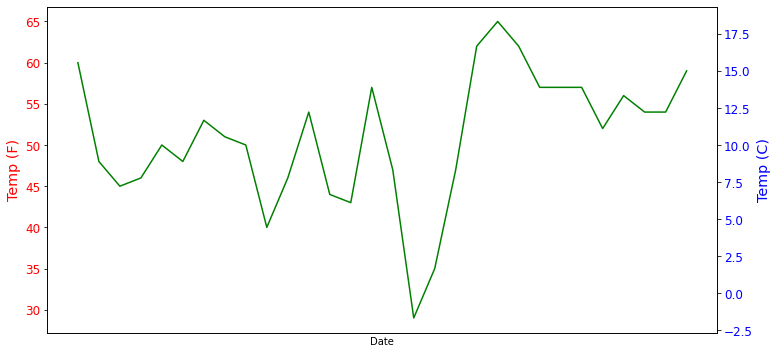

In [13]:
 # Subplot
fig, ax_tempF = plt.subplots()

# Similar a fig=plt.figure(figsize=(12,6))
fig.set_figwidth(12)
fig.set_figheight(6)

# seta rótulo de x 
ax_tempF.set_xlabel('Date')

# bottom= false desabilita ticks e rótulo de baixo no eixo x
ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

# seta o rotulo do eixo y a esquerda
ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

# seta cor e tamanho do rótulo do eixo y a esquerda
ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

# plota AvgTemp no eixo y a esquerda
ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='green')

# twinx seta o mesmo eixo x para as duas plotagens
ax_tempC = ax_tempF.twinx()

# pega o ymin e ymin de AvgTemp em Fahrenheit
ymin, ymax = ax_tempF.get_ylim()

# seta ymin e ymin de AvgTemp em Fahrenheit para AvgTemp em Celsius
ax_tempC.set_ylim((fahrenheit2celsius(ymin),
                   fahrenheit2celsius(ymax)))

# seta o rotulo do eixo y a direita
ax_tempC.set_ylabel('Temp (C)', 
                    color='blue',
                    size='x-large')

# plota AvgTemp em Celsius no eixo y a direita
ax_tempC.tick_params(axis='y', 
                     labelcolor='blue', 
                     labelsize='large')

plt.show()

Foi definida uma função para calcular diferentes unidades de dados, ou seja, converter de *Fahrenheit* para *Celsius*.

Podemos ver que a "Temp" do eixo y esquerdo foi plotada em *Fahrenheit* e a "Temp" do eixo x direito foi plotada em *Celsius*.

Fonte: Traduzido de [Data-visualization-using-matplotlib](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)